In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
register_matplotlib_converters()
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv("fcc-forum-pageviews.csv",index_col=["date"],parse_dates=["date"],date_parser=parse_date,)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [146]:
#Clean the data by filtering out days when the page views were in 
# the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) &(df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


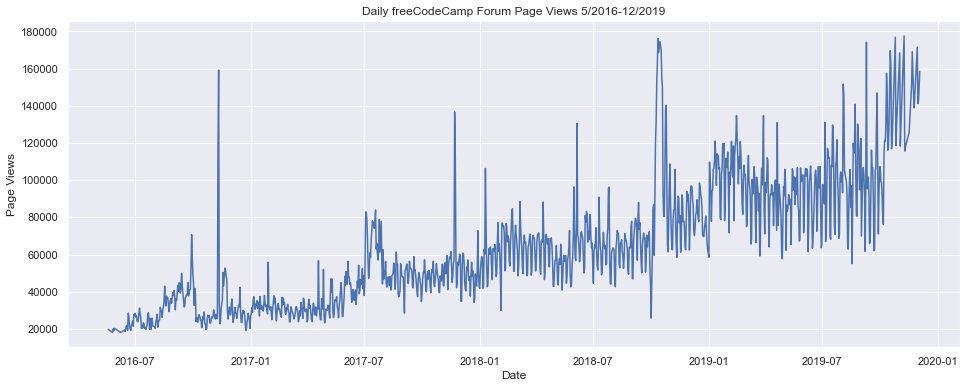

In [147]:
x=df.index
y=df['value']
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel("Date")
plt.ylabel('Page Views')
plt.plot(x,y)


['2016-07',
 '2017-01',
 '2017-07',
 '2018-01',
 '2018-07',
 '2019-01',
 '2019-07',
 '2020-01']

In [132]:
c=[v for v in z]
c

['2016-07',
 '2017-01',
 '2017-07',
 '2018-01',
 '2018-07',
 '2019-01',
 '2019-07',
 '2020-01']